# Simple RNN (Many-to-one 문제)
- 사인파 시계열 예측 문제

사인파형 시계열을 입력으로 다음 스텝의 출려을 예측

3개의 순서열을 입력한 수 출력값이 target과 일치하게 만듦

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
s = np.sin(2*np.pi/8. * np.array(20))
s

6.123233995736766e-16

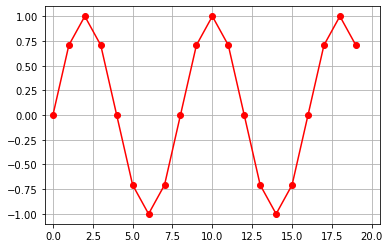

In [9]:
s = np.sin(2 * np.pi * 0.125 * np.arange(20))
plt.plot(s, 'ro-')
plt.xlim(-0.5, 20.5)
plt.ylim(-1.1, 1.1)
plt.grid()
plt.show()

## 원래의 시계열 벡터를 Toeplitz 행렬 형태로 변환
(대각선 위의 성분들이 같은 정사각 행렬)

In [10]:
from scipy.linalg import toeplitz
S = np.fliplr(toeplitz(np.r_[s[-1], np.zeros(s.shape[0]-2)], s[::-1]))
S[:5, :4]

array([[ 0.00000000e+00,  7.07106781e-01,  1.00000000e+00,
         7.07106781e-01],
       [ 7.07106781e-01,  1.00000000e+00,  7.07106781e-01,
         1.22464680e-16],
       [ 1.00000000e+00,  7.07106781e-01,  1.22464680e-16,
        -7.07106781e-01],
       [ 7.07106781e-01,  1.22464680e-16, -7.07106781e-01,
        -1.00000000e+00],
       [ 1.22464680e-16, -7.07106781e-01, -1.00000000e+00,
        -7.07106781e-01]])

In [11]:
S.shape

(19, 20)

In [12]:
X_train = S[:-1,:3][:,:,np.newaxis]
Y_train = S[:-1,3]
X_train.shape, Y_train.shape

((18, 3, 1), (18,))

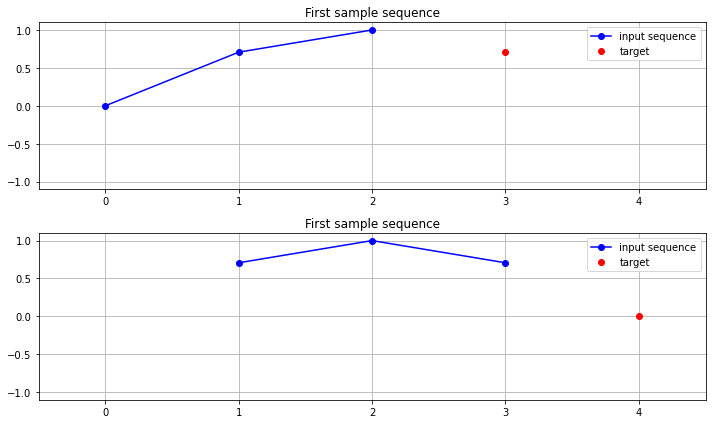

In [16]:
plt.figure(figsize=(10,6))

plt.subplot(211)
plt.plot([0,1,2], X_train[0].flatten(), 'bo-', label='input sequence')
plt.plot([3], Y_train[0], 'ro', label='target')
plt.xlim(-0.5, 4.5); plt.ylim(-1.1,1.1); plt.legend()
plt.grid(); plt.title("First sample sequence")

plt.subplot(212)
plt.plot([1,2,3], X_train[1].flatten(), 'bo-', label='input sequence')
plt.plot([4], Y_train[1], 'ro', label='target')
plt.xlim(-0.5, 4.5); plt.ylim(-1.1,1.1); plt.legend()
plt.grid(); plt.title("First sample sequence")

plt.tight_layout(); plt.show()

## 순환경신경망 모델 정의/설명

In [17]:
import tensorflow as tf
seed = 2021
np.random.seed(seed)
tf.random.set_seed(seed)

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN

In [29]:
model = Sequential([
    SimpleRNN(10, input_shape=X_train.shape[1:], activation='tanh'),
    Dense(1, activation='linear')
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_1 (SimpleRNN)     (None, 10)                120       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 11        
Total params: 131
Trainable params: 131
Non-trainable params: 0
_________________________________________________________________


In [30]:
model.compile(optimizer='adam', loss='mse')

## 모델 학습 전

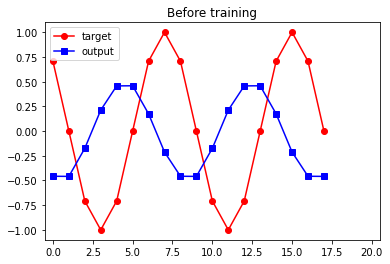

In [32]:
plt.plot(Y_train, 'ro-', label="target")
plt.plot(model.predict(X_train[:, :, :]), 'bs-', label="output")
plt.xlim(-0.5, 20.5)
plt.ylim(-1.1, 1.1)
plt.legend()
plt.title("Before training")
plt.show()

## 모델 학습

In [33]:
history = model.fit(X_train, Y_train, epochs=100, verbose=0)

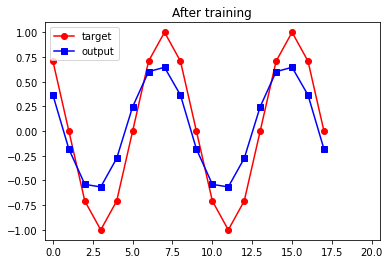

In [35]:
plt.plot(Y_train, 'ro-', label="target")
plt.plot(model.predict(X_train[:, :, :]), 'bs-', label="output")
plt.xlim(-0.5, 20.5)
plt.ylim(-1.1, 1.1)
plt.legend()
plt.title("After training")
plt.show()

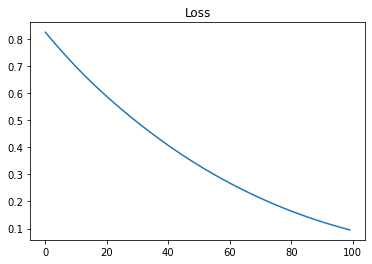

In [36]:
plt.plot(history.history["loss"])
plt.title("Loss")
plt.show()